In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



Iteration 1


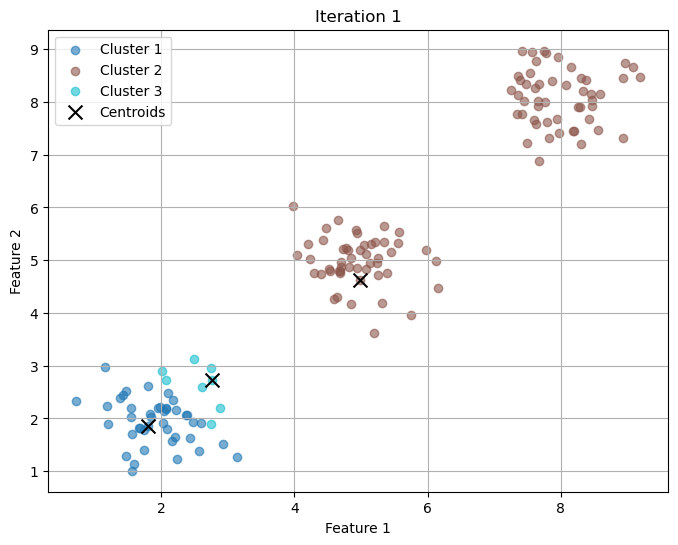

Updated centroids:
[[1.90711397 1.93924797]
 [6.47205131 6.53933905]
 [2.54017094 2.640229  ]]
Splitting cluster 1 due to high variance.
Merging clusters 0 and 2 due to proximity.

Iteration 2


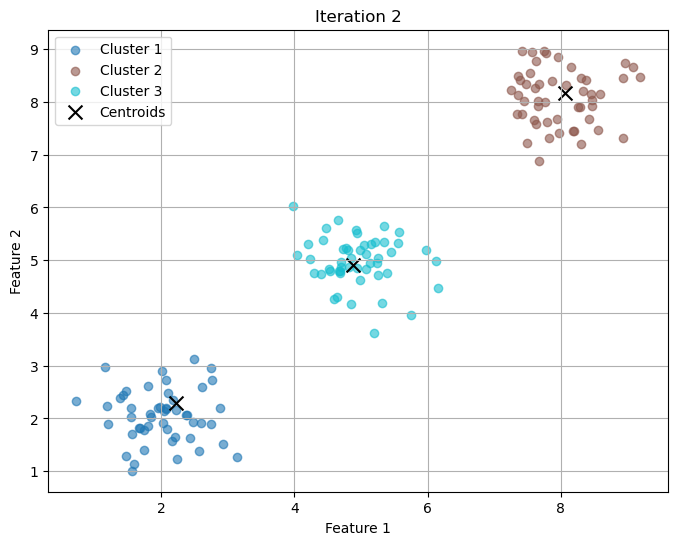

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 3


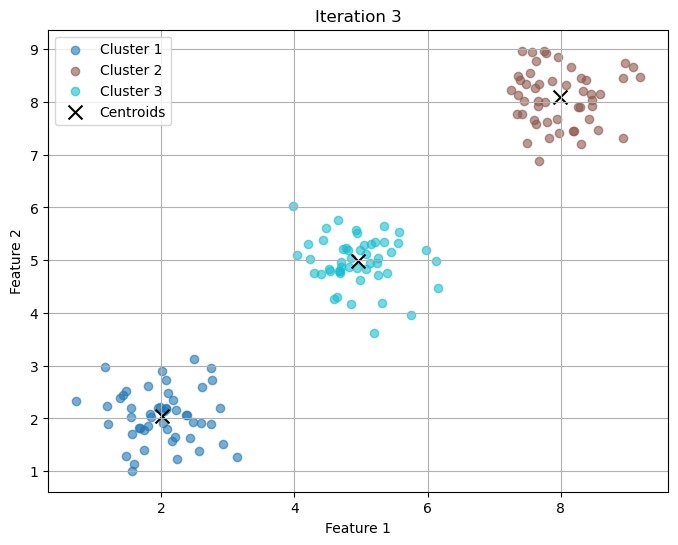

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 4


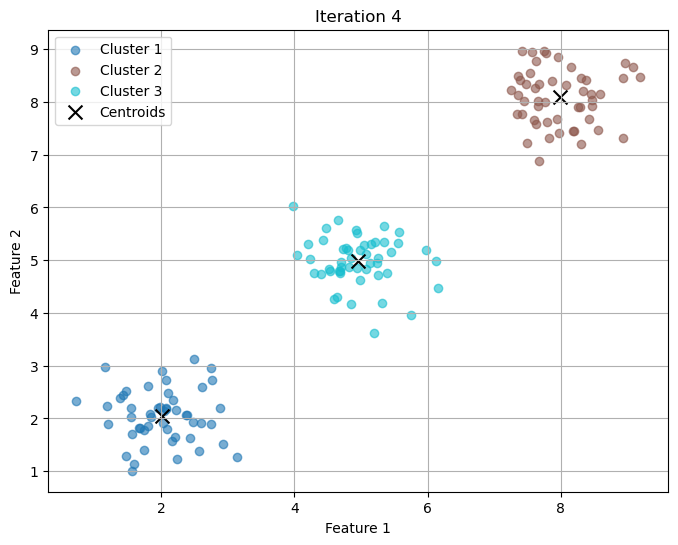

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 5


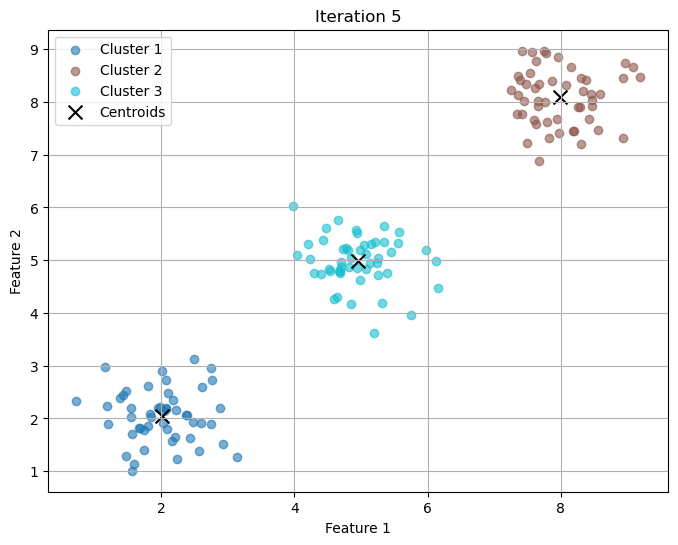

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 6


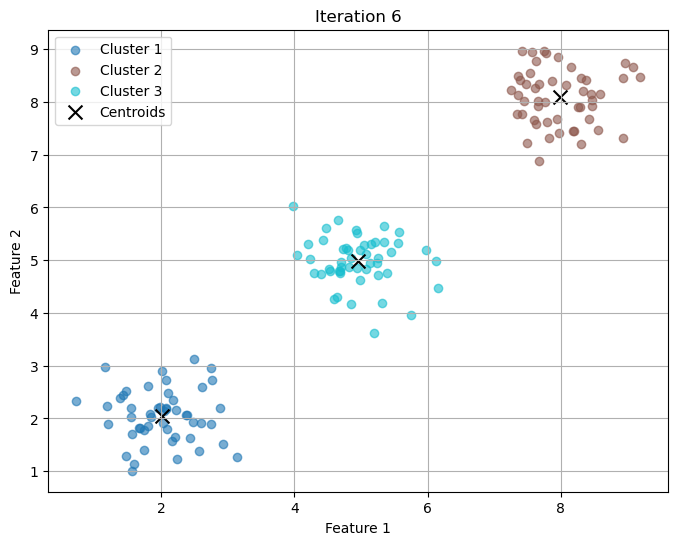

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 7


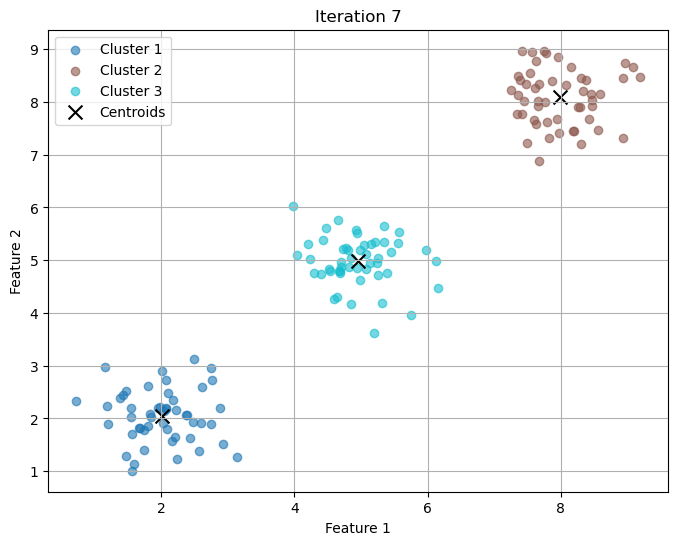

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 8


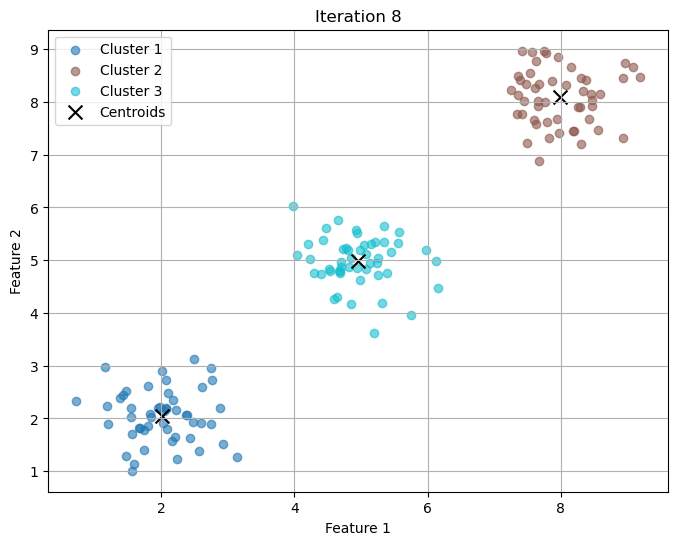

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 9


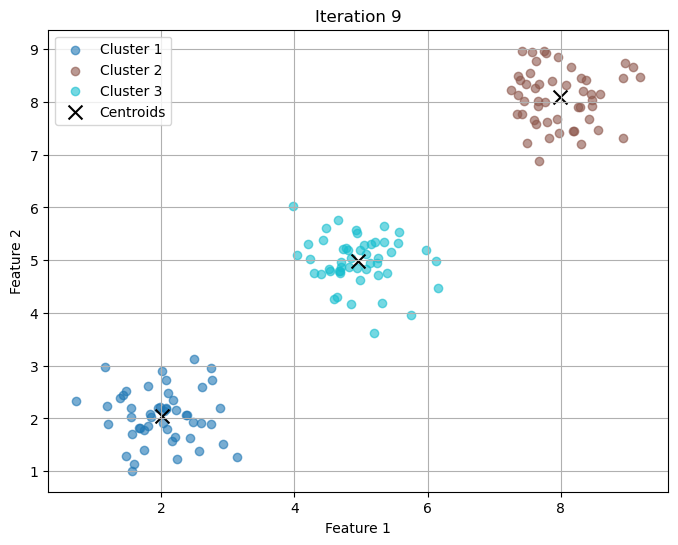

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Iteration 10


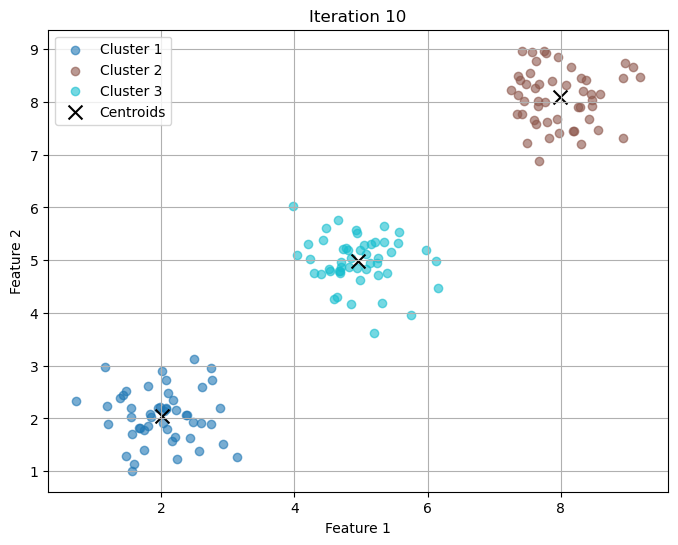

Updated centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]

Final centroids:
[[2.00840308 2.05140493]
 [7.99063924 8.09137373]
 [4.95346338 4.98730436]]


In [5]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

class ISODATA:
    def __init__(self, K, max_iter=100, min_samples=5, split_threshold=1.0, merge_threshold=0.5):
        self.K = K
        self.max_iter = max_iter
        self.min_samples = min_samples
        self.split_threshold = split_threshold
        self.merge_threshold = merge_threshold
        self.centroids = []

    def fit(self, data):
        # Initialize centroids randomly
        self.centroids = data[np.random.choice(data.shape[0], self.K, replace=False)]
        
        for iteration in range(self.max_iter):
            print(f"\nIteration {iteration + 1}")

            # Assign points to the nearest centroid
            labels = self._assign_clusters(data)
            
            # Plot the current state of the clustering
            self._plot_clusters(data, labels, iteration)

            # Recalculate centroids
            new_centroids = []
            for i in range(self.K):
                points = data[labels == i]
                if len(points) > 0:
                    new_centroids.append(points.mean(axis=0))
                else:
                    # If no points are assigned, reinitialize the centroid
                    new_centroids.append(data[np.random.choice(data.shape[0])])
            
            self.centroids = np.array(new_centroids)
            print(f"Updated centroids:\n{self.centroids}")

            # Check for splitting and merging
            self._split_clusters(data, labels)
            self._merge_clusters(data, labels)

        return self.centroids

    def _assign_clusters(self, data):
        # Calculate distances and assign each point to the nearest centroid
        distances = cdist(data, self.centroids, 'euclidean')
        labels = np.argmin(distances, axis=1)
        return labels

    def _split_clusters(self, data, labels):
        for i in range(len(self.centroids)):
            points = data[labels == i]
            if len(points) < self.min_samples:
                continue

            # Calculate standard deviation for the cluster
            std_dev = np.std(points, axis=0)
            if np.linalg.norm(std_dev) > self.split_threshold:
                print(f"Splitting cluster {i} due to high variance.")
                # Split cluster into two new clusters
                self.centroids[i] = points.mean(axis=0) + std_dev
                self.centroids = np.vstack([self.centroids, points.mean(axis=0) - std_dev])
                self.K += 1

    def _merge_clusters(self, data, labels):
        # Calculate pairwise distances between centroids
        distances = cdist(self.centroids, self.centroids, 'euclidean')
        np.fill_diagonal(distances, np.inf)

        for i in range(len(self.centroids)):
            for j in range(i + 1, len(self.centroids)):
                if distances[i, j] < self.merge_threshold:
                    print(f"Merging clusters {i} and {j} due to proximity.")
                    # Merge two clusters by averaging their centroids
                    self.centroids[i] = (self.centroids[i] + self.centroids[j]) / 2
                    self.centroids = np.delete(self.centroids, j, axis=0)
                    self.K -= 1
                    return  # Only one merge per iteration for simplicity

    def _plot_clusters(self, data, labels, iteration):
        plt.figure(figsize=(8, 6))
        colors = plt.cm.tab10(np.linspace(0, 1, self.K))

        for i in range(self.K):
            points = data[labels == i]
            plt.scatter(points[:, 0], points[:, 1], color=colors[i], label=f'Cluster {i + 1}', alpha=0.6)

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
        plt.title(f'Iteration {iteration + 1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    data = np.vstack([
        np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
        np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2)),
        np.random.normal(loc=[5, 5], scale=0.5, size=(50, 2)),
    ])

    # Initialize ISODATA with 3 initial clusters
    isodata = ISODATA(K=3, max_iter=10, split_threshold=1.5, merge_threshold=1.0)
    final_centroids = isodata.fit(data)
    print("\nFinal centroids:")
    print(final_centroids)
